<h2><b>Advanced extra tasks for extra points (varying challenges, some require Googling):</b></h2>

<ul>
<li><b>4. Try out any of the previous examples and exercises by using any or many
of the following additional plotting libraries:<br /><br />
</li>
<ul>
<li><b>Matplotlib (this is the most common in addition to seaborn,
especially regarding machine learning, recommended to learn)</b><br />
<a href="https://matplotlib.org/stable/tutorials/index.html#introductory">https://matplotlib.org/stable/tutorials/index.html#introductory</a><br /><br /></li>
<li><b>Plotly</b><br />
<a href="https://plotly.com/python/getting-started/">https://plotly.com/python/getting-started/</a><br /><br /></li>
<li><b>Bokeh</b><br /><a href="https://docs.bokeh.org/en/latest/docs/user_guide.html">https://docs.bokeh.org/en/latest/docs/user_guide.html</a>
<br /><br /></li>
</ul>
</ul>
<img src="http://srv.plab.fi/~tuomasv/data_analytics_2023_images/exercise_set_3/charts.png" />


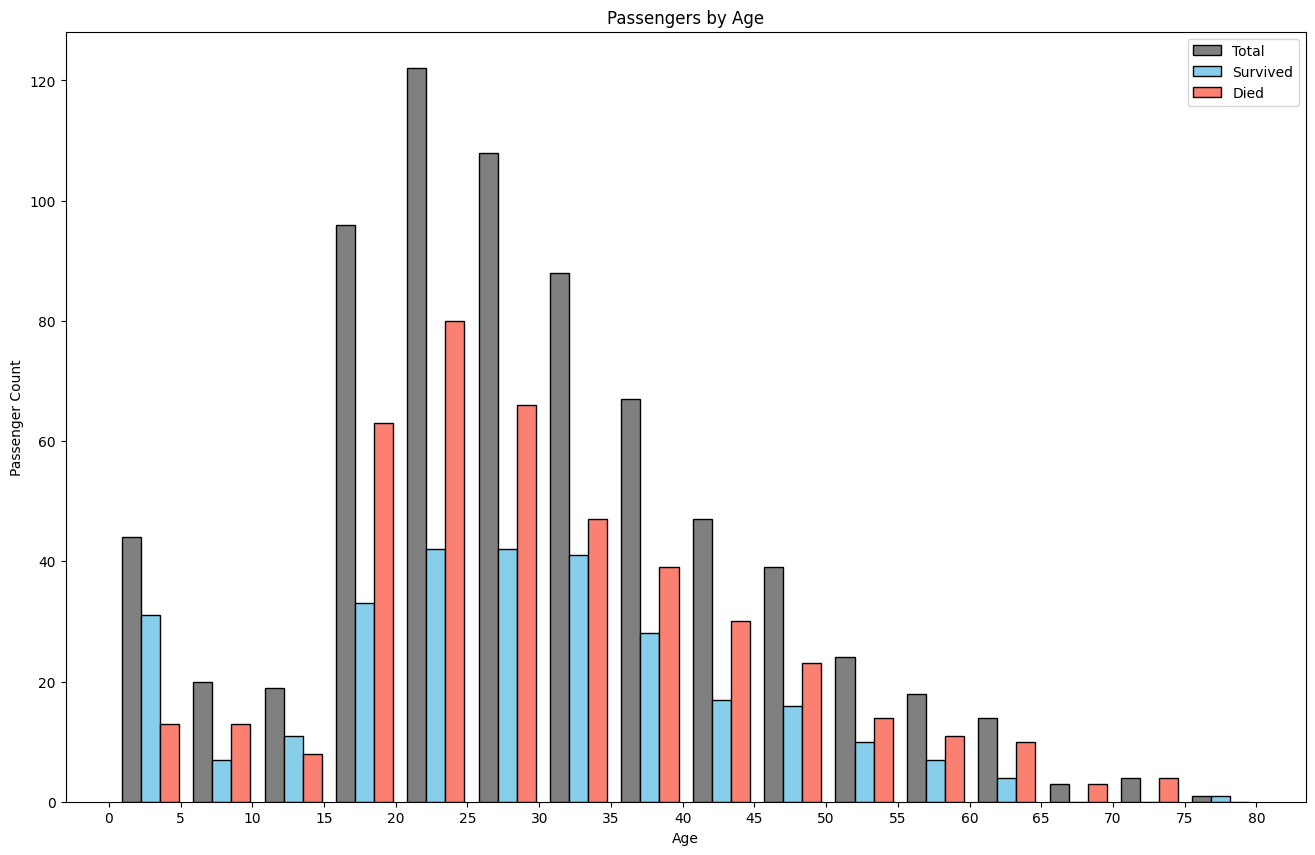

In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Titanic dataset
df_titanic = sns.load_dataset('titanic')
df_age = df_titanic['age'].dropna()
df_survived_age = df_titanic[df_titanic['survived'] == 1]['age'].dropna()
df_died_age = df_titanic[df_titanic['survived'] == 0]['age'].dropna()

# Determine the range for age bins
age_range = (min(df_age), max(df_age))

# Plot histograms for passengers that survived and died next to each other
plt.figure(figsize=(16, 10))
plt.hist([df_age, df_survived_age, df_died_age], bins=16, range=age_range, color=['grey', 'skyblue', 'salmon'], edgecolor='black', label=['Total', 'Survived', 'Died'])
# Set x-axis ticks and labels for increments of 5
plt.xticks(np.arange(0, max(age_range)+1, 5))
plt.title('Passengers by Age')
plt.xlabel('Age')
plt.ylabel('Passenger Count')
plt.legend()

<p style="color: green;">Most children under 5 and between 10 and 15 were saved. Most people died in all other age groups.</p>

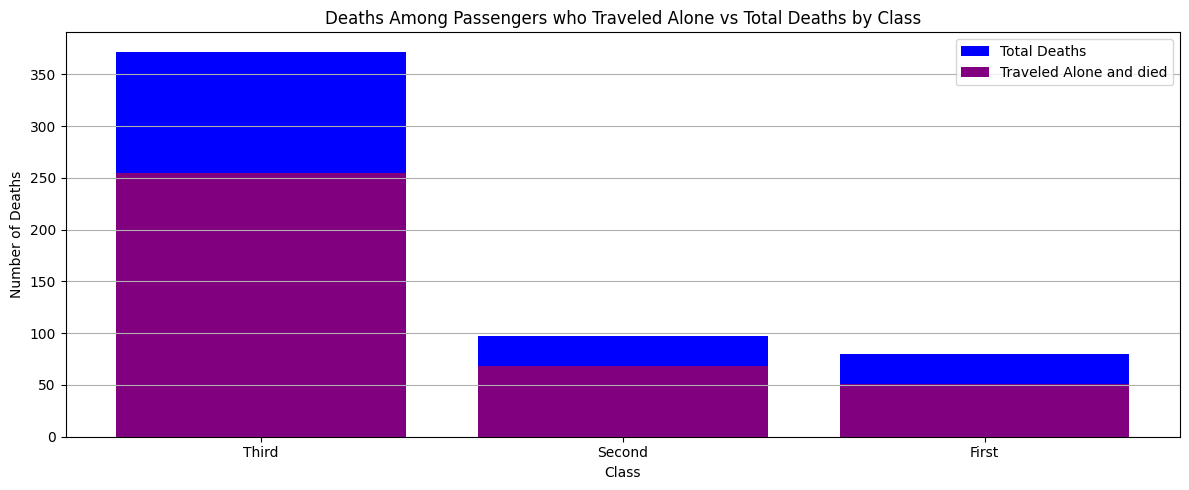

In [110]:
# deceased passengers who travelled alone
df_died = df_titanic[df_titanic['survived'] == 0]
died_alone_passengers = df_died[df_died['alone'] == True]

# counts by class 
death_counts = df_died['class'].value_counts()
dead_alone_counts = died_alone_passengers['class'].value_counts()

# Create subplots for each category
fig, ax = plt.subplots(figsize=(12, 5))

# Plot histogram for deaths by class
ax.bar(death_counts.index, death_counts.values, color='blue', label='Total Deaths')

# Plot histogram for passengers who traveled alone and died by class
ax.bar(dead_alone_counts.index, dead_alone_counts.values, color='purple', label='Traveled Alone and died')
ax.set_title('Deaths Among Passengers who Traveled Alone vs Total Deaths by Class')
ax.set_xlabel('Class')
ax.set_ylabel('Number of Deaths')
ax.legend()
ax.grid(axis='y')

plt.tight_layout()
plt.show()

<p style="color: green;">If you traveled alone, you had a higher chance of dying.</p>

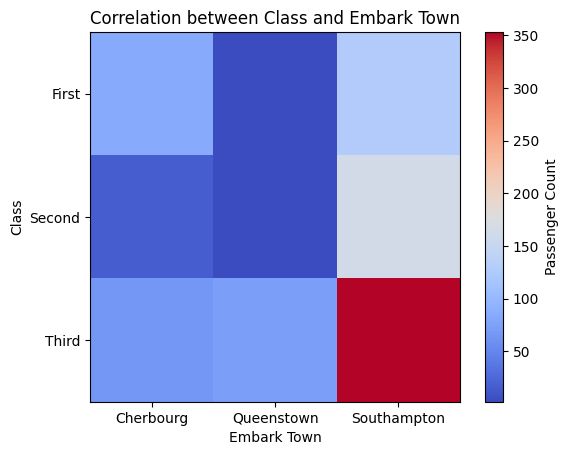

In [111]:
# Drop rows with missing values in 'class' or 'embark_town'
df_titanic.dropna(subset=['class', 'embark_town'], inplace=True)

# Use pandas crosstab between 'class' and 'embark_town'
# creates a frequency table with index as 'class' and columns as 'embark_town'
cross_table = pd.crosstab(df_titanic['class'], df_titanic['embark_town'])

# Plot the heatmap
plt.imshow(cross_table, cmap='coolwarm')
plt.colorbar(label='Passenger Count')
plt.title('Correlation between Class and Embark Town')
plt.xlabel('Embark Town')
plt.ylabel('Class')
plt.xticks(range(len(cross_table.columns)), cross_table.columns)
plt.yticks(range(len(cross_table.index)), cross_table.index)
plt.show()

<p style="color: green;">People from Southampton are more likely to be in 3rd class.</p>

<ul>
<li><b>5. Try out any of the datasets below, or find yourself an interesting csvdataset from kaggle.com!  </b><br>

Use all your skills in numpy, pandas and seaborn, and find out features in
the data. <br ><br />
<b>Was there something that is surprising in the dataset? What
interesting correlations did you find?</b>
<br><br>
<b>Some interesting datasets, examples (you can find you own too!):</b>
</li>
<ul>
<li><a href="https://www.kaggle.com/anamvillalpando/world-happiness-ranking">https://www.kaggle.com/anamvillalpando/world-happiness-ranking</a></li>
<li><a href="https://www.kaggle.com/sakshigoyal7/credit-card-customers">https://www.kaggle.com/sakshigoyal7/credit-card-customers</a></li>
<li><a href="https://www.kaggle.com/lucabasa/dutch-energy">https://www.kaggle.com/lucabasa/dutch-energy</a></li>
<li><a href="https://www.kaggle.com/yamaerenay/spotify-dataset-19212020-160k-tracks?select=data_w_genres.csv">https://www.kaggle.com/yamaerenay/spotify-dataset-19212020-160k-tracks?select=data_w_genres.csv</a></li>
<li><a href="https://www.kaggle.com/kboghe/android-apps-metadata?select=Android+apps+csv.csv">https://www.kaggle.com/kboghe/android-apps-metadata?select=Android+apps+csv.csv</a></li>
<li><a href="https://www.kaggle.com/sudalairajkumar/cryptocurrencypricehistory?select=coin_Bitcoin.csv">https://www.kaggle.com/sudalairajkumar/cryptocurrencypricehistory?select=coin_Bitcoin.csv</a><br /><br /></li>
</ul>
<li><b>Note:</b> These datasets can be quite rough to handle at first, feel free to
ask tips from your instructor if some dataset interests you!</li>
</ul>

<img src="http://srv.plab.fi/~tuomasv/data_analytics_2023_images/exercise_set_2/es2_5.png" />

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandasgui import show

# Load the Happiness dataset
df_happiness = pd.read_csv('Happiness.csv')
show(df_happiness)

PandasGUI INFO — pandasgui.gui — Opening PandasGUI
C:\Users\marc\AppData\Local\Temp\ipykernel_17232\1730614410.py:9: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

C:\Users\marc\AppData\Local\Temp\ipykernel_17232\1730614410.py:9: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

C:\Users\marc\AppData\Local\Temp\ipykernel_17232\1730614410.py:9: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

C:\Users\marc\AppData\Local\Temp\ipykernel_17232\

In [69]:
# get the happiest and least happy countries
max_happiness = np.max(df_happiness['Ladder score'])
min_happiness = np.min(df_happiness['Ladder score'])
happiest_country = df_happiness[df_happiness['Ladder score'] == max_happiness]['Country name']
least_happy_country = df_happiness[df_happiness['Ladder score'] == min_happiness]['Country name']

print('Happiest country:', happiest_country.values[0])
print('Least happy country:', least_happy_country.values[0])

Happiest country: Finland
Least happy country: Afghanistan


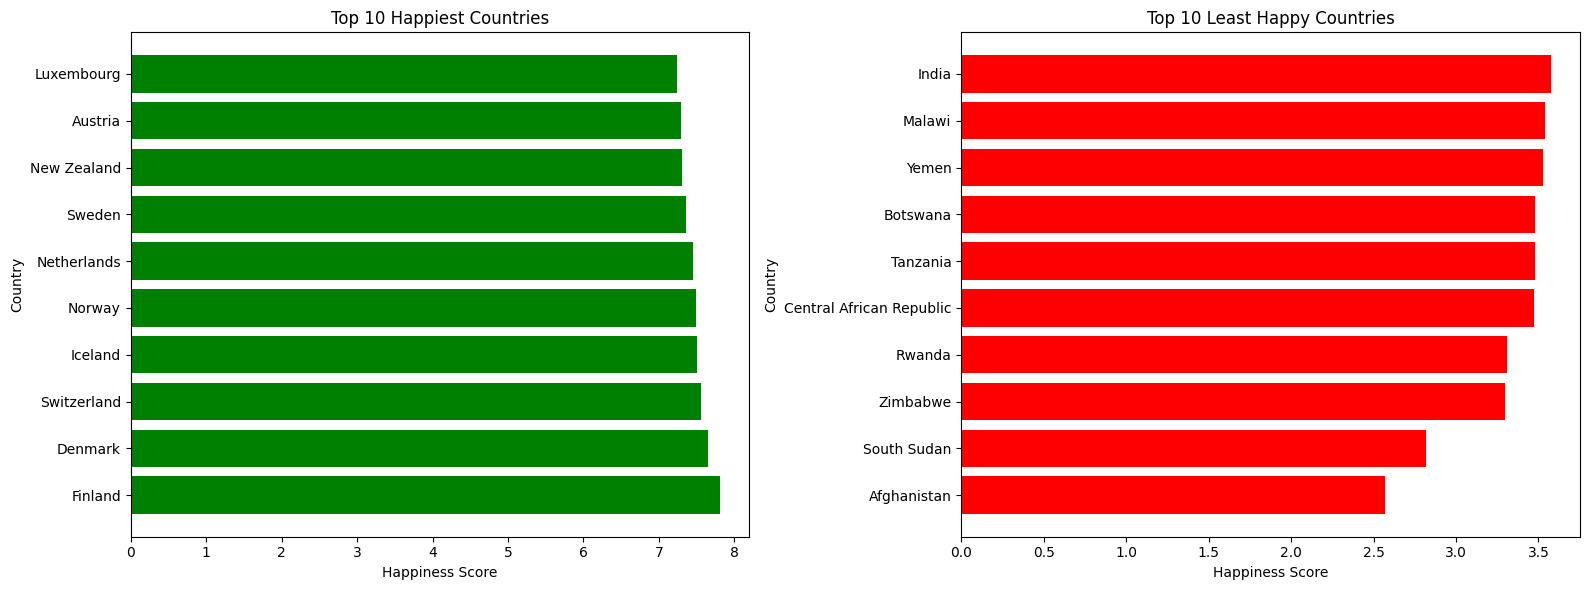

In [70]:
# Get the top 10 happiest and least happy countries
happiest_countries = df_happiness.nlargest(10, 'Ladder score')
least_happy_countries = df_happiness.nsmallest(10, 'Ladder score')

# Create subplots for each category
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# Plot bar chart for happiest countries
ax[0].barh(happiest_countries['Country name'], happiest_countries['Ladder score'], color='green')
ax[0].set_title('Top 10 Happiest Countries')
ax[0].set_xlabel('Happiness Score')
ax[0].set_ylabel('Country')

# Plot bar chart for least happy countries
ax[1].barh(least_happy_countries['Country name'], least_happy_countries['Ladder score'], color='red')
ax[1].set_title('Top 10 Least Happy Countries')
ax[1].set_xlabel('Happiness Score')
ax[1].set_ylabel('Country')

plt.tight_layout()
plt.show()

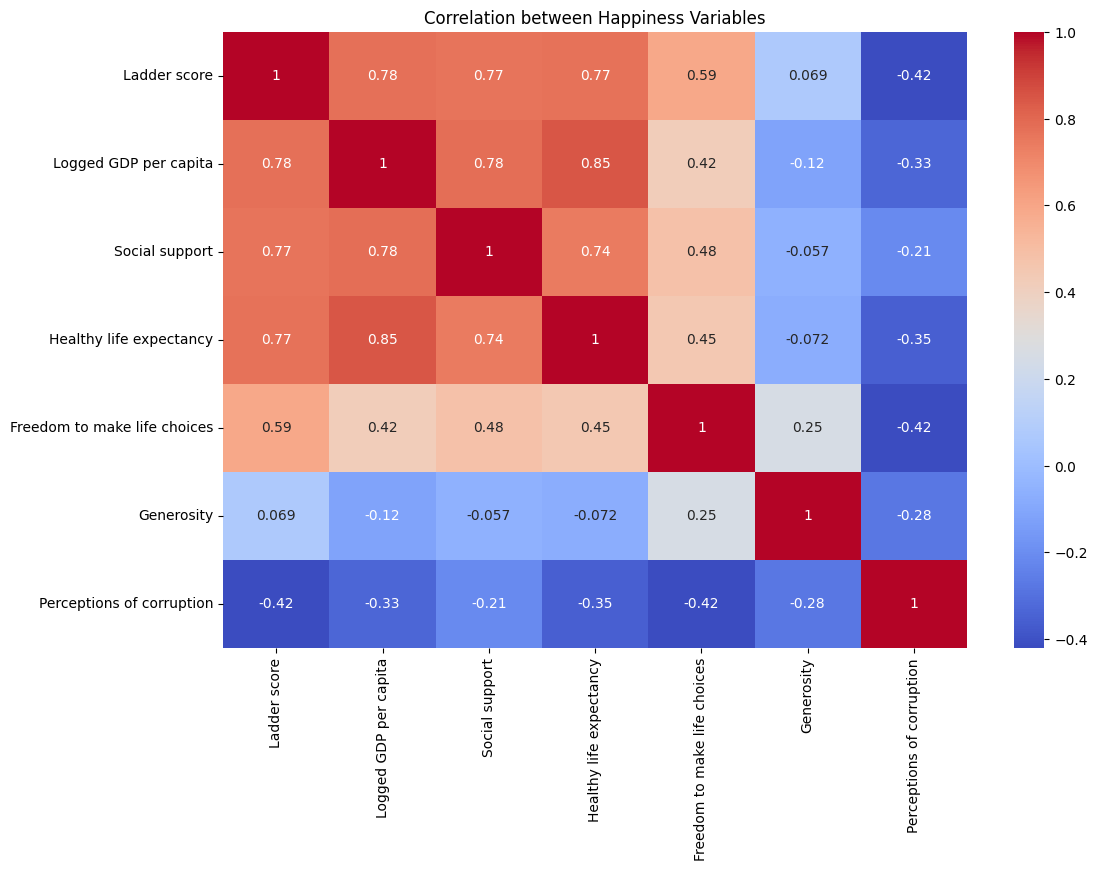

In [71]:
# Drop unnecessary columns
drop_columns = ['Ladder score in Dystopia', 'Standard error of ladder score', 'upperwhisker', 'lowerwhisker', 'Explained by: Log GDP per capita', 'Explained by: Social support', 'Explained by: Healthy life expectancy', 'Explained by: Freedom to make life choices', 'Explained by: Generosity', 'Explained by: Perceptions of corruption', 'Dystopia + residual']
df_happiness.drop(columns=drop_columns, inplace=True)

# Create a correlation matrix
correllation_happiness = df_happiness.corr(numeric_only=True)

plt.figure(figsize=(12, 8))
sns.heatmap(correllation_happiness, annot=True, cmap='coolwarm')
plt.title('Correlation between Happiness Variables')
plt.show()

<p style="color: green;">The biggest factors that increase happiness are GDP per capita, social support, and healthy life expectancy.</p>

(6.0, 11.5)

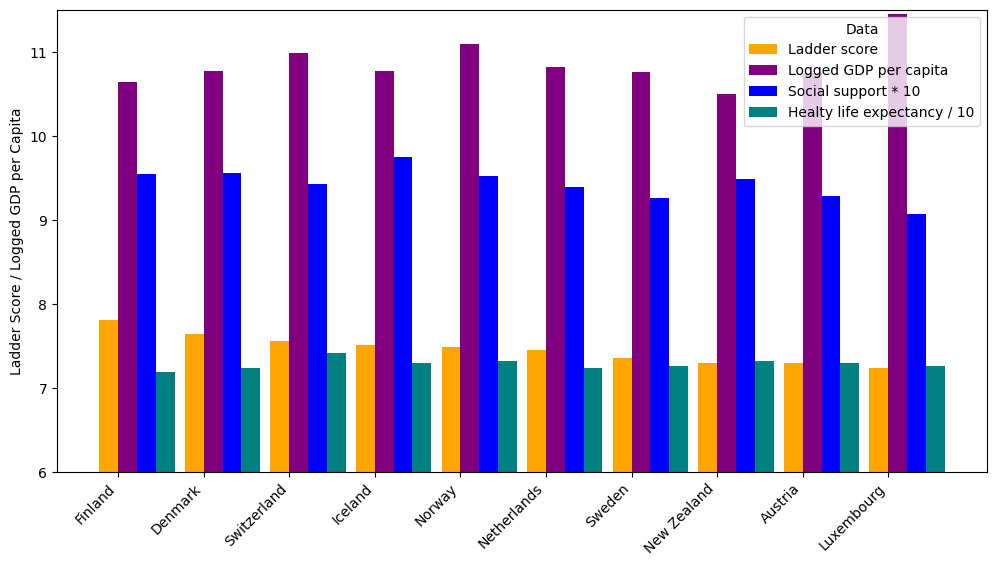

In [73]:
from matplotlib.patches import Patch

plt.figure(figsize=(12, 6))
bar_width = 0.22

# Plot Ladder score bars
plt.bar(range(len(happiest_countries)), happiest_countries['Ladder score'], width=bar_width, label='Ladder score', color='orange')
# Plot GDP bars
plt.bar([x + bar_width for x in range(len(happiest_countries))], happiest_countries['Logged GDP per capita'], width=bar_width, label='Logged GDP per capita', color='purple')
# Plot Social support bars
plt.bar([x + 2 * bar_width for x in range(len(happiest_countries))], happiest_countries['Social support'] * 10, width=bar_width, label='Social support', color='blue')
# Plot Healthy life expectancy bars
plt.bar([x + 3 * bar_width for x in range(len(happiest_countries))], happiest_countries['Healthy life expectancy'] / 10, width=bar_width, label='Healthy life expectancy', color='teal')

# Set x-ticks and labels
plt.xticks([x + bar_width/2 for x in range(len(happiest_countries))], happiest_countries['Country name'], rotation=45, ha='right')
# Set y-axis label
plt.ylabel('Ladder Score / Logged GDP per Capita')

# Chat-GPT: Create custom legend
legend_elements = [Patch(facecolor='orange', label='Ladder score'), Patch(facecolor='purple', label='Logged GDP per capita'), Patch(facecolor='blue', label='Social support * 10'), Patch(facecolor='teal', label='Healty life expectancy / 10'),]
plt.legend(handles=legend_elements, title='Data')
plt.ylim(6, 11.5)